# ML Exploration with Scikit-learn and Correlation Analysis

1. Importing Required Libraries
What the code does:
This cell imports essential Python libraries needed for working with data, creating visuals, and building machine learning models.

💡 Why this matters:
Each library has a unique role:

pandas handles tabular data (like Excel sheets).

numpy supports fast math operations.

matplotlib and seaborn create beautiful charts, which are critical for understanding data visually.

scikit-learn (or sklearn) is one of the most popular libraries for machine learning in Python. It includes tools for data preparation, model building, and evaluation.

Real-world relevance:
These are the “everyday tools” of a data analyst or ML engineer. Knowing them is like knowing your screwdriver, wrench, and tape measure if you’re a builder.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

2. Loading the Dataset
What the code does:
Loads a CSV (Comma-Separated Values) file into a DataFrame so we can start analyzing the data.

Why this matters:
Before any analysis or modeling, we need to import the raw data into Python so we can work with it programmatically.

Real-world relevance:
Data almost always comes in files like CSVs, Excel, or databases. The ability to read and preview your data is the first and most critical step in any project.

In [ ]:
# Load the Dataset
df = pd.read_csv("credit_risk_dataset.csv")

df.dropna(axis=0,how='any', inplace=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## 🧠 Wednesday: Data Correlation and Relationships
Understanding relationships between numerical variables using `.corr()`

3. 🧠 Understanding Correlation Between Variables
✅ What the code does:
Calculates the correlation matrix and visualizes it as a heatmap to show relationships between numeric variables.

💡 Why this matters:
Correlation tells us how one number changes in relation to another. For example:

Does income increase as loan amount increases?

Do older applicants tend to borrow more or less?

Knowing this helps us:

Detect useful features for prediction

Avoid using duplicate or misleading features


🧠 Real-world relevance:
In financial analysis, marketing, or health data, strong correlations often indicate cause-effect relationships—or warn us of hidden problems like multicollinearity in ML.


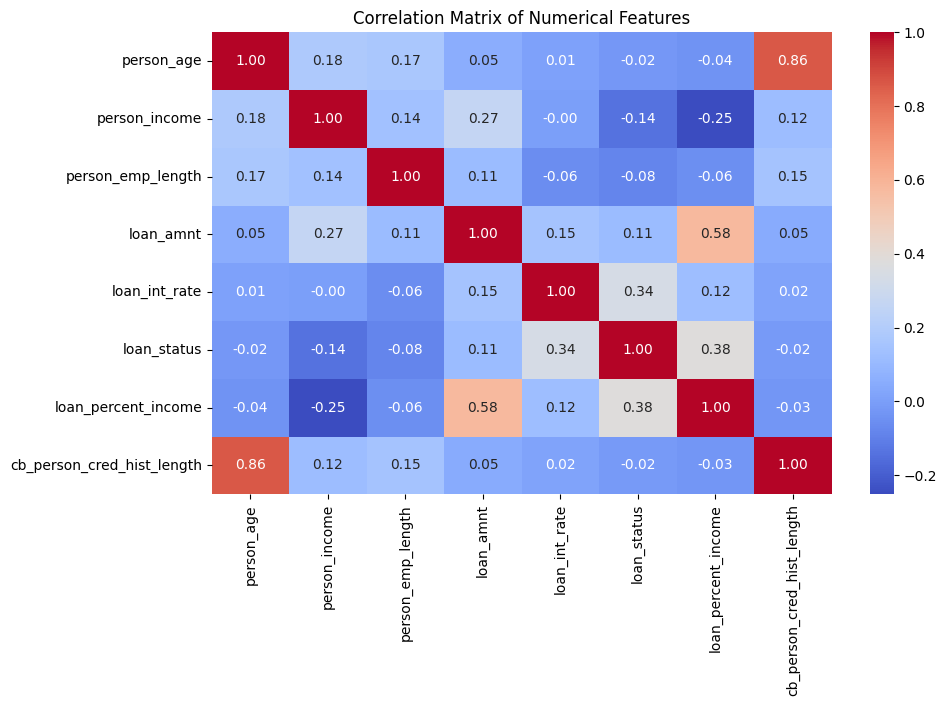

In [3]:
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

4. 🔍 Visualizing Key Relationships
✅ What the code does:
Creates a scatter plot to visually explore the relationship between income and loan amount.

💡 Why this matters:
Visuals reveal patterns that numbers alone might hide. Scatter plots help us see the kind of relationship: linear, curved, or none at all.

🧠 Real-world relevance:
In data science presentations or reports, visuals like this help communicate your insights to non-technical stakeholders.

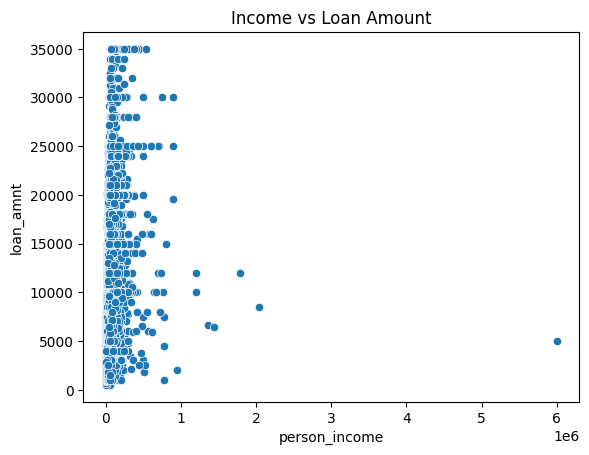

In [6]:
sns.scatterplot(x='person_income', y='loan_amnt', data=df)
plt.title("Income vs Loan Amount")
plt.show()

## Scikit-learn Preprocessing
Feature selection and transformation using StandardScaler and OneHotEncoder

5. Defining Features and Target
What the code does:
Separates the target (what we want to predict) from the features (what we’ll use to make that prediction).

Why this matters:
Machine learning always works by learning a mapping from input features (like income or age) to a target output (like loan status).

Real-world relevance:
Choosing the right features and defining the target is the foundation of any supervised machine learning task.

In [7]:
y = df['loan_status']
X = df.drop(columns='loan_status')

6. Identifying Categorical and Numerical Features
What the code does:
Lists all columns that are either numerical or categorical.

Why this matters:
ML models handle numeric and non-numeric (text) data very differently. We need to transform or encode categorical data so models can understand it.

Real-world relevance:
This is part of feature engineering, one of the most important skills in machine learning. Preparing the right format boosts accuracy significantly.


In [8]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

7. Preprocessing: Scaling and Encoding
What the code does:
Creates a pipeline that:

Scales numerical values so they’re on the same scale.

Converts categorical values into numerical format using one-hot encoding.

Why this matters:

Scaling ensures that large numbers (like income) don’t dominate small numbers (like age) just because of size.

One-hot encoding makes categorical data usable by converting text like "Rent" into [1, 0, 0], "Own" into [0, 1, 0], etc.

Real-world relevance:
Poorly preprocessed data leads to bad models. Preprocessing is a huge part of the data cleaning and data preparation stages of a project.


In [11]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
])
X_processed = preprocessor.fit_transform(X)
print("Feature matrix shape after preprocessing:", X_processed.shape)

Feature matrix shape after preprocessing: (28638, 26)


## Scikit-learn — Basic Model Application

8. KMeans Clustering
What the code does:
Uses the KMeans algorithm to group people into 3 segments (clusters) based on all features.

Why this matters:
Clustering helps us find hidden patterns in data. Unlike regression or classification, clustering is unsupervised, meaning we don’t need labeled output.

Real-world relevance:
Used in marketing to group customers, in healthcare to find patient types, and in finance to segment applicants.


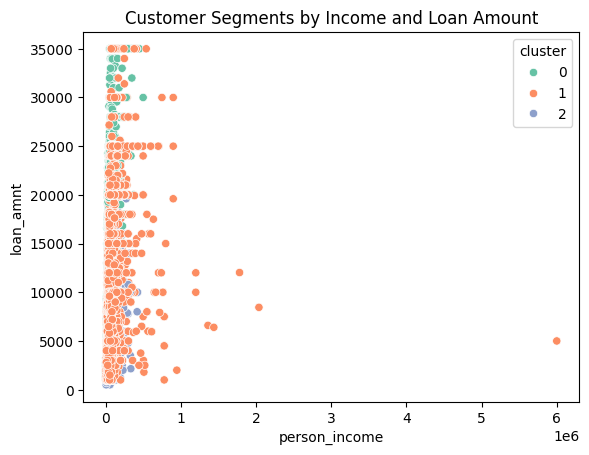

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_processed)
df['cluster'] = kmeans.labels_
sns.scatterplot(x='person_income', y='loan_amnt', hue='cluster', data=df, palette='Set2')
plt.title("Customer Segments by Income and Loan Amount")
plt.show()

9. Linear Regression: Predicting Trends
What the code does:
Uses LinearRegression to predict loan amount based on income. It splits data into training and test sets, trains the model, and plots predicted vs actual values.

Why this matters:
This shows how ML models learn patterns in data. Linear regression is easy to understand—it tries to draw the best-fit line through the points.

Real-world relevance:
Regression is widely used in business forecasting (e.g., revenue), pricing, and even health prediction (e.g., predicting BMI from age and lifestyle factors).

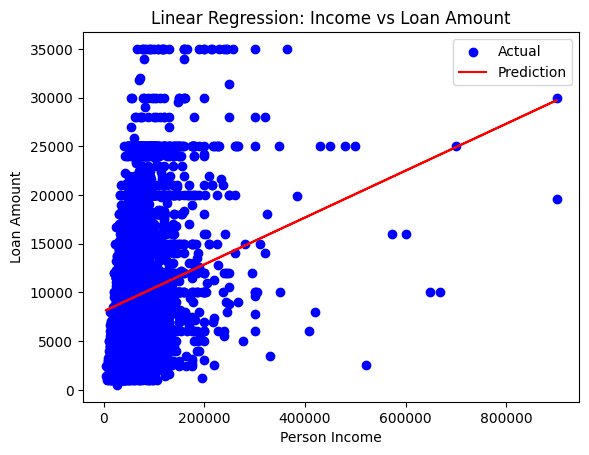

In [13]:
X_lr = df[['person_income']]
y_lr = df['loan_amnt']
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, lr_model.predict(X_test), color='red', label='Prediction')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('Linear Regression: Income vs Loan Amount')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.10131867667899896
